In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/IMDB Dataset.csv', on_bad_lines='skip', engine='python')

In [ ]:
#convert all text to lowercase
df['processed_reviews'] = df['review'].str.lower()

In [ ]:
import re
def remove_html_tags(text):
  return re.sub(r'<[^>]*>', '', text)
df['processed_reviews'] = df['processed_reviews'].apply(remove_html_tags)

In [ ]:
def remove_special_characters(text):
  return re.sub(r'[^a-zA-Z\s]', '', text)
df['processed_reviews'] = df['processed_reviews'].apply(remove_special_characters)

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab resource

# Tokenization
df['tokens'] = df['processed_reviews'].apply(word_tokenize)

# Display the updated DataFrame
print(df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                   processed_reviews  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production the filming tech...   
2  i thought this was a wonderful way to spend ti...   
3  basically theres a family where a little boy j...   
4  petter matteis love in the time of money is a ...   

                                              tokens  
0  [one, of, the, other, reviewers, has, mentione...  
1  [a, wonderful, little, production, the, filmin...  
2  [i, thought, this, was, a, wonderful, way, to,...  
3  [basically, theres, a, family, where, a, li

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df['tokens'] = df['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

In [ ]:
#join token back into sentences
df['processed_reviews'] = df['tokens'].apply(lambda x: ' '.join(x))

# **Exploratory Data Analysis**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Overview of the dataset
print("Dataset Shape:", df.shape)
print("Column Names:", df.columns)
print(df.info())
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Convert the 'tokens' column to tuples before checking for duplicates
df['tokens'] = df['tokens'].apply(tuple)

# Check for duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

Dataset Shape: (33243, 4)
Column Names: Index(['review', 'sentiment', 'processed_reviews', 'tokens'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33243 entries, 0 to 33242
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   review             33243 non-null  object
 1   sentiment          33243 non-null  object
 2   processed_reviews  33243 non-null  object
 3   tokens             33243 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB
None
                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                   processed_revie

In [ ]:
# Basic statistics for numeric columns
print("\nDescriptive Statistics:")
print(df.describe())

# Check unique values for categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{col}':", df[col].nunique())



Descriptive Statistics:
                                                   review sentiment  \
count                                               33243     33243   
unique                                              33057         2   
top     Loved today's show!!! It was a variety and not...  negative   
freq                                                    5     16631   

                                        processed_reviews  \
count                                               33243   
unique                                              33054   
top     love today show varieti sole cook would great ...   
freq                                                    5   

                                                   tokens  
count                                               33243  
unique                                              33054  
top     (love, today, show, varieti, sole, cook, would...  
freq                                                    5  
Unique values

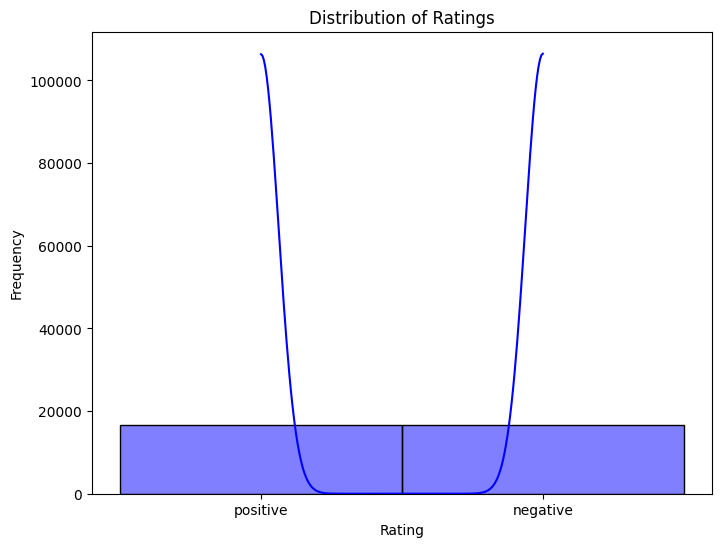

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment'], kde=True, bins=20, color='blue')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

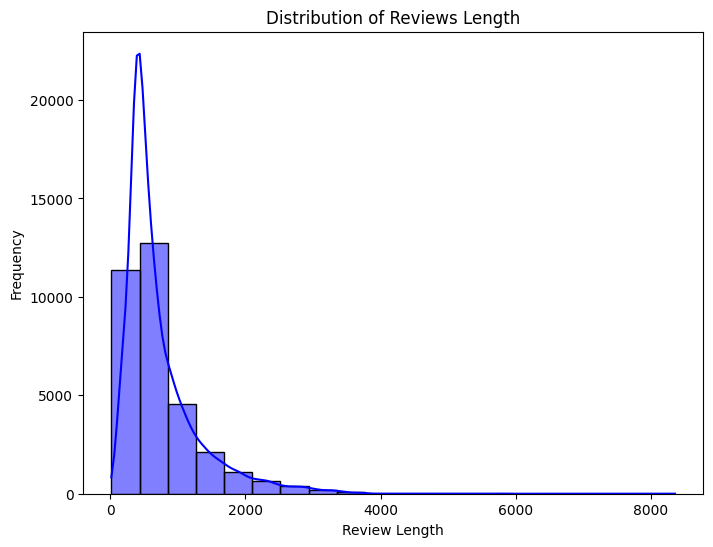

<ipython-input-13-42d67bb9cdbd>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count for word, count in most_common_words],


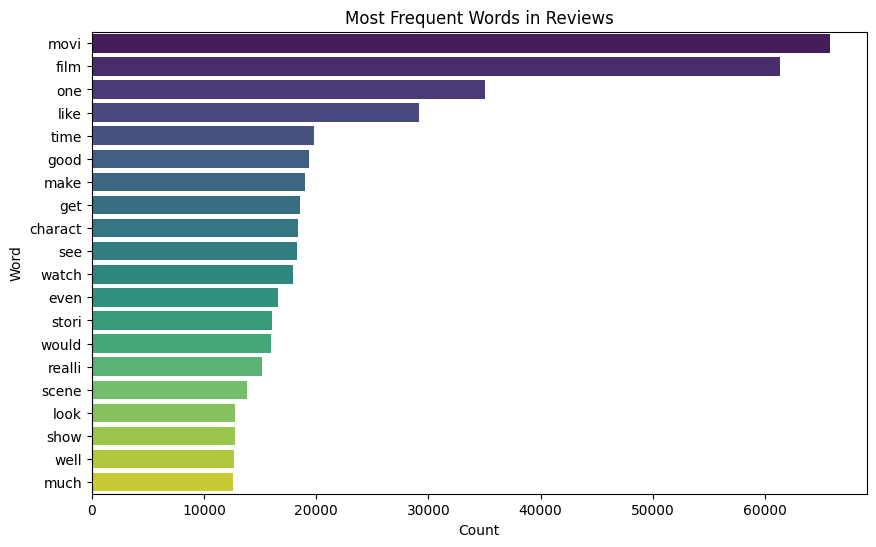

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.histplot(df['processed_reviews'].str.len(), kde=True, bins=20, color='blue')
plt.title("Distribution of Reviews Length") # **Updated the title**
plt.xlabel("Review Length") # **Updated the x-axis label**
plt.ylabel("Frequency")
plt.show()


# Count plot for most frequent words in 'processed_reviews'
plt.figure(figsize=(10, 6))
# **Instead of 'genre', we will use the most frequent words in 'processed_reviews' column**
from collections import Counter
word_counts = Counter(" ".join(df['processed_reviews']).split())
most_common_words = word_counts.most_common(20)  # Get the 20 most common words
sns.barplot(x=[count for word, count in most_common_words],
            y=[word for word, count in most_common_words],
            palette='viridis')
plt.title("Most Frequent Words in Reviews") # **Updated the title**
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

# Distribution of ratings

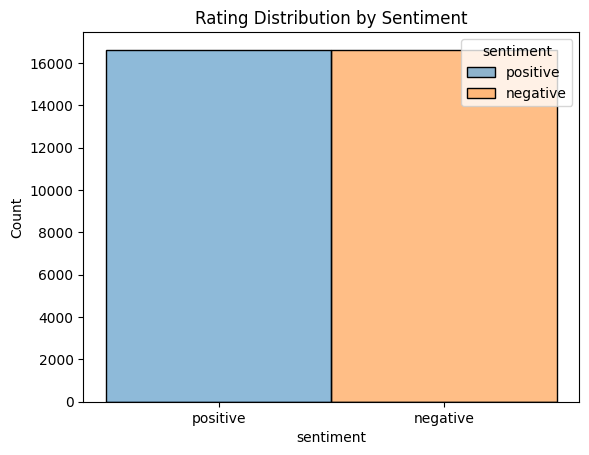

In [ ]:
# Assuming your ratings column is named 'sentiment' based on your previous code,
# let's try using that instead of 'rating'.

sns.histplot(data=df, x='sentiment', hue='sentiment', kde=True)
plt.title('Rating Distribution by Sentiment')
plt.show()

# Reviews over time

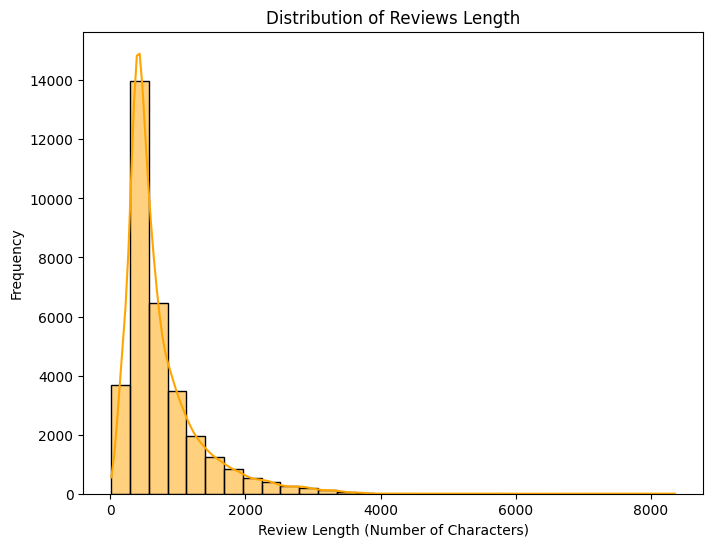

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['processed_reviews'].str.len(), kde=True, bins=30, color='orange')
plt.title("Distribution of Reviews Length")  # Updated the title
plt.xlabel("Review Length (Number of Characters)")  # Updated x-axis label
plt.ylabel("Frequency")
plt.show()

# Wordcloud for reviews

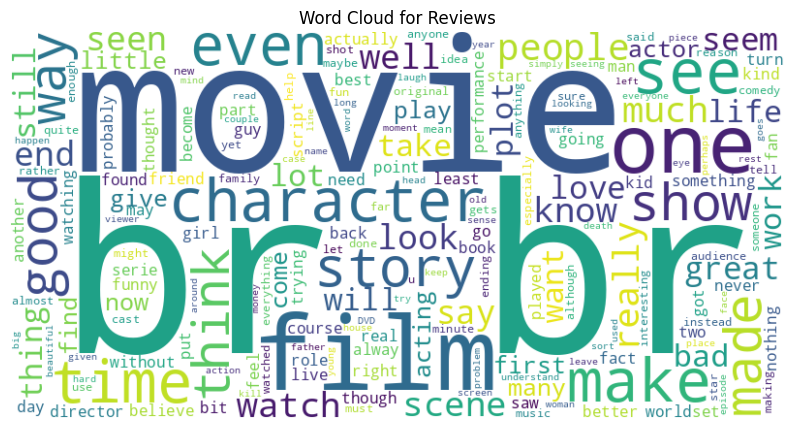

In [ ]:
from wordcloud import WordCloud

# WordCloud for reviews (assuming there's a 'review' column)
text = " ".join(review for review in df['review'].dropna())
wordcloud = WordCloud(background_color='white', colormap='viridis', width=800, height=400).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Reviews")
plt.show()


# **Topic modeling**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a document-term matrix
# Assuming 'processed_reviews' column contains the cleaned text data:
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['processed_reviews'])  # Changed 'cleaned_reviews' to 'processed_reviews'

# Get feature names (words)
words = vectorizer.get_feature_names_out()

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Set up LDA model
lda = LatentDirichletAllocation(n_components=8, random_state=42)  # Adjust n_components as needed
lda.fit(dtm)

# Get the top words for each topic
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print([words[i] for i in topic.argsort()[-10:]])


Topic 1:
['watch', 'realli', 'scene', 'good', 'time', 'look', 'make', 'horror', 'like', 'film']
Topic 2:
['think', 'dont', 'time', 'make', 'bad', 'realli', 'good', 'watch', 'like', 'movi']
Topic 3:
['good', 'scene', 'perform', 'time', 'charact', 'great', 'movi', 'play', 'stori', 'film']
Topic 4:
['good', 'funni', 'charact', 'anim', 'tv', 'time', 'watch', 'like', 'episod', 'seri']
Topic 5:
['like', 'time', 'end', 'movi', 'make', 'plot', 'scene', 'stori', 'charact', 'film']
Topic 6:
['live', 'make', 'use', 'human', 'man', 'film', 'world', 'war', 'kill', 'peopl']
Topic 7:
['charact', 'music', 'time', 'like', 'play', 'life', 'stori', 'movi', 'love', 'film']
Topic 8:
['great', 'star', 'funni', 'guy', 'comedi', 'film', 'movi', 'good', 'like', 'play']


In [ ]:
# Assign each review to a topic
topic_results = lda.transform(dtm)
df['topic'] = topic_results.argmax(axis=1)

# Inspect the dataset
print(df[['review', 'topic']].head())


                                              review  topic
0  One of the other reviewers has mentioned that ...      5
1  A wonderful little production. <br /><br />The...      4
2  I thought this was a wonderful way to spend ti...      4
3  Basically there's a family where a little boy ...      1
4  Petter Mattei's "Love in the Time of Money" is...      6


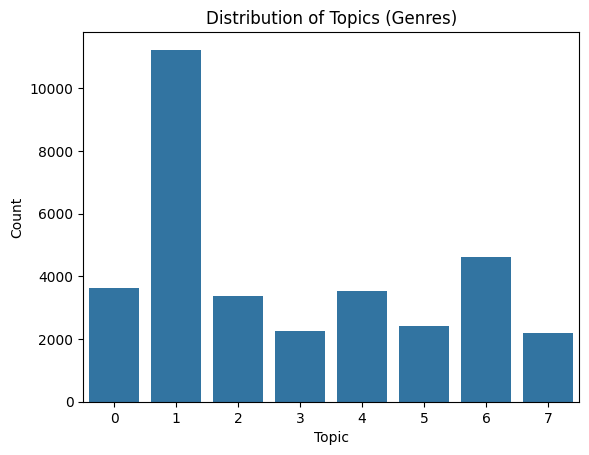

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot topic distribution
sns.countplot(x='topic', data=df)
plt.title('Distribution of Topics (Genres)')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Assuming 'lda_results' contains the probabilities of each review for all topics
# and 'reviews_df' is your DataFrame with a "Review" column.

# Instead of lda_results use topic_results from cell 46
topic_results = lda.transform(dtm) # This line might be redundant if topic_results is already calculated in cell 46

# Extract the most probable topic for each review
df['Topic'] = topic_results.argmax(axis=1) + 1  # Adding 1 to match topic numbers # Changed reviews_df to df
# Map topics to genres
topic_to_genre = {
    1: "Drama",
    2: "Musical/Romance",
    3: "Criticism",
    4: "TV Shows",
    5: "Action/War",
    6: "Performances",
    7: "Mixed Opinions",
    8: "Thriller",
}
df['Genre'] = df['Topic'].map(topic_to_genre) # Changed reviews_df to df

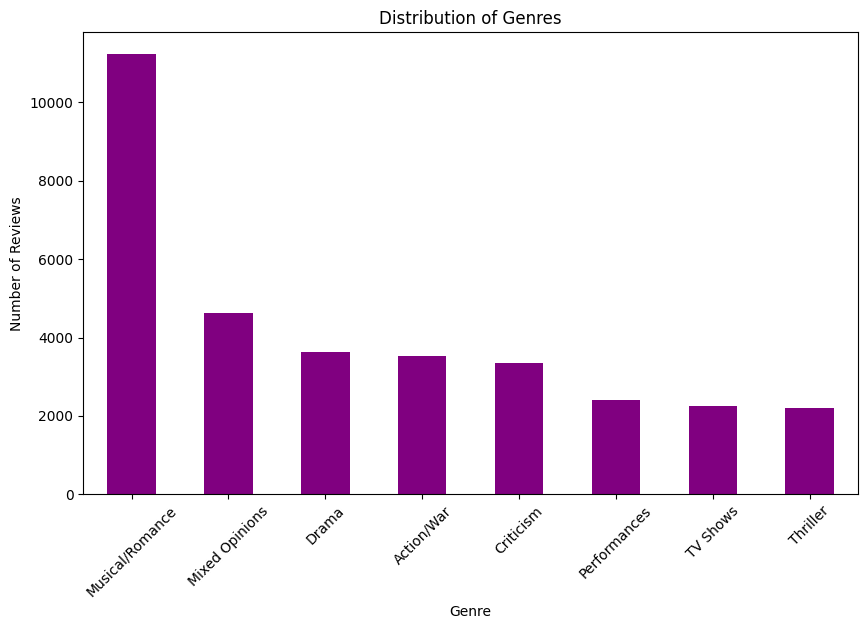

In [ ]:
import matplotlib.pyplot as plt

# Count the number of reviews for each genre
genre_counts = df['Genre'].value_counts() # Changed reviews_df to df

# Plot a bar chart
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='purple')
plt.title("Distribution of Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()

In [ ]:
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print([words[i] for i in topic.argsort()[-15:]])  # Extract top 15 words per topic


Topic 1:
['say', 'effect', 'bad', 'peopl', 'seen', 'watch', 'realli', 'scene', 'good', 'time', 'look', 'make', 'horror', 'like', 'film']
Topic 2:
['thing', 'charact', 'film', 'peopl', 'act', 'think', 'dont', 'time', 'make', 'bad', 'realli', 'good', 'watch', 'like', 'movi']
Topic 3:
['role', 'make', 'best', 'actor', 'work', 'good', 'scene', 'perform', 'time', 'charact', 'great', 'movi', 'play', 'stori', 'film']
Topic 4:
['season', 'origin', 'movi', 'comedi', 'great', 'good', 'funni', 'charact', 'anim', 'tv', 'time', 'watch', 'like', 'episod', 'seri']
Topic 5:
['act', 'play', 'work', 'action', 'perform', 'like', 'time', 'end', 'movi', 'make', 'plot', 'scene', 'stori', 'charact', 'film']
Topic 6:
['life', 'like', 'time', 'end', 'way', 'live', 'make', 'use', 'human', 'man', 'film', 'world', 'war', 'kill', 'peopl']
Topic 7:
['make', 'live', 'famili', 'great', 'year', 'charact', 'music', 'time', 'like', 'play', 'life', 'stori', 'movi', 'love', 'film']
Topic 8:
['girl', 'time', 'tri', 'make',

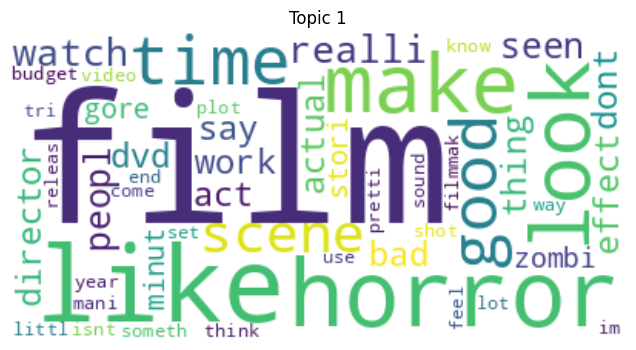

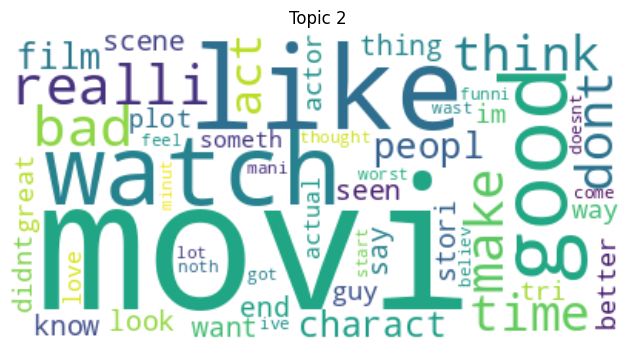

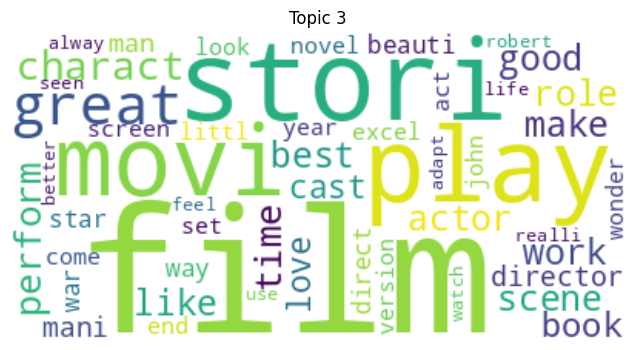

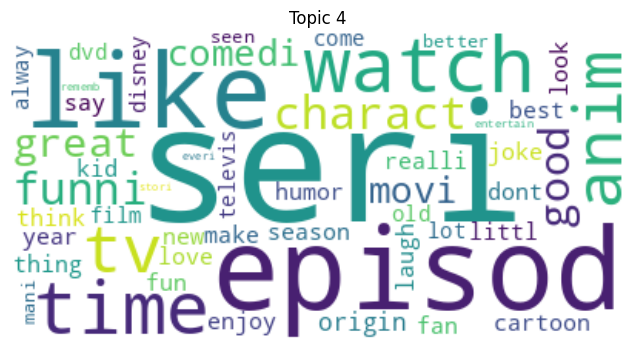

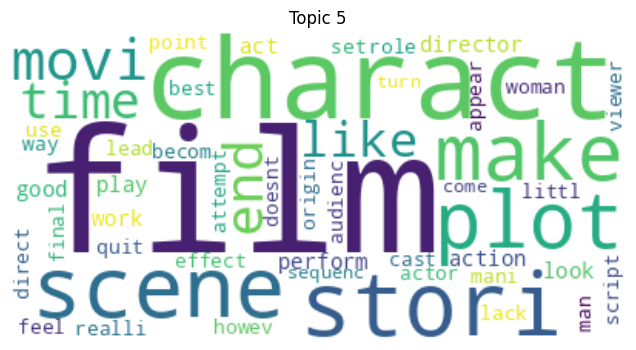

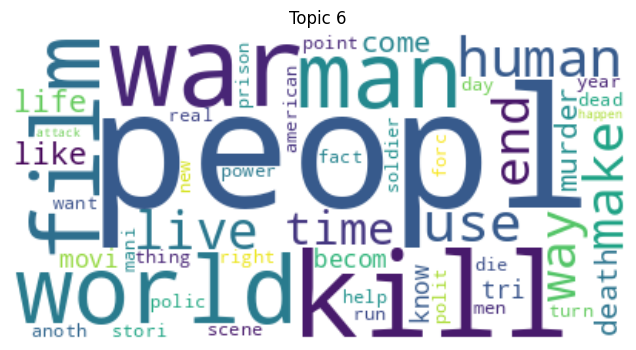

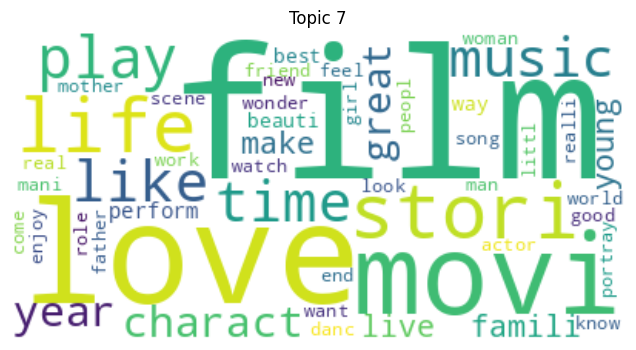

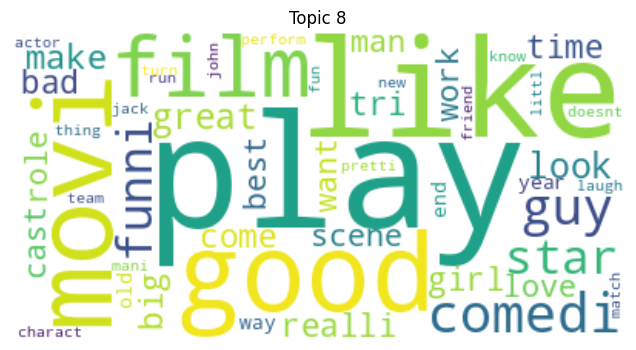

In [ ]:
from wordcloud import WordCloud

# Generate word clouds for each topic
for idx, topic in enumerate(lda.components_):
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(
        {words[i]: topic[i] for i in topic.argsort()[-50:]}  # Top 50 words per topic
    )
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {idx + 1}")
    plt.show()


In [ ]:
pip install bertopic


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.6 MB/s eta 0:00:00


In [ ]:
from bertopic import BERTopic

# Fit BERTopic on your dataset
bertopic_model = BERTopic()
topics, probs = bertopic_model.fit_transform(df['processed_reviews'])

# Get topic information
print(bertopic_model.get_topic_info())

# Visualize topic clusters
bertopic_model.visualize_topics()


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

     Topic  Count                                      Name  \
0       -1  23599                     -1_movi_film_one_like   
1        0   1052                 0_show_episod_season_seri   
2        1    804                    1_movi_worst_ever_seen   
3        2    315            2_bollywood_khan_indian_salman   
4        3    234               3_film_filmmak_charact_seem   
..     ...    ...                                       ...   
213    212     10                212_madonna_otro_hong_film   
214    213     10               213_sex_softcor_dum_entrail   
215    214     10  214_aborigin_starrett_hutchinson_widmark   
216    215     10           215_radio_barri_stone_champlain   
217    216     10        216_lumumba_belgian_congo_congoles   

                                        Representation  \
0    [movi, film, one, like, make, time, get, chara...   
1    [show, episod, season, seri, tv, watch, funni,...   
2    [movi, worst, ever, seen, watch, bad, saw, see...   
3    [bolly

In [ ]:
bertopic_model.visualize_topics()


In [ ]:
bertopic_model.visualize_barchart(top_n_topics=20)


Bar Chart: Display the count of how many topics match each theme

In [ ]:
# Validate the mapping
print(df["Assigned_Topic"].value_counts())
print(df["Genre"].value_counts())


KeyError: 'Assigned_Topic'

In [ ]:
# Verify grouping counts
print(genre_counts)


Genre
Musical/Romance    11231
Mixed Opinions      4614
Drama               3632
Action/War          3541
Criticism           3359
Performances        2413
TV Shows            2261
Thriller            2192
Name: count, dtype: int64


In [ ]:
print("Number of rows in the dataset:", df.shape[0])


Number of rows in the dataset: 33243


In [ ]:
# Check topic probabilities for the first few reviews
print(topic_results[:10])  # Assuming topic_results is your LDA model output


[[0.30812608 0.05496239 0.00088203 0.1402455  0.0008818  0.49313841
  0.0008817  0.0008821 ]
 [0.00166996 0.00167045 0.27139516 0.00167016 0.51444163 0.20581322
  0.00166962 0.00166979]
 [0.00166966 0.18940577 0.00166933 0.1539901  0.30920501 0.00166947
  0.20302328 0.13936738]
 [0.05235423 0.47213364 0.00215853 0.00215741 0.0021597  0.21395773
  0.25292001 0.00215875]
 [0.23766531 0.00115969 0.17375577 0.0011589  0.00115963 0.00115946
  0.58278131 0.00115993]
 [0.00245417 0.33014467 0.15200116 0.0024552  0.00245406 0.00245537
  0.5055805  0.00245488]
 [0.00215944 0.43332858 0.00215843 0.55371709 0.00215874 0.00216062
  0.00215917 0.00215793]
 [0.0021963  0.33934377 0.00219677 0.64747754 0.00219638 0.00219592
  0.00219715 0.00219618]
 [0.49312309 0.30400786 0.00227627 0.00227655 0.19148759 0.00227528
  0.00227768 0.00227569]
 [0.00736534 0.61732468 0.00735902 0.00737362 0.00736172 0.0073635
  0.33848826 0.00736387]]


In [ ]:
print(topic_to_genre)


{1: 'Drama', 2: 'Musical/Romance', 3: 'Criticism', 4: 'TV Shows', 5: 'Action/War', 6: 'Performances', 7: 'Mixed Opinions', 8: 'Thriller'}


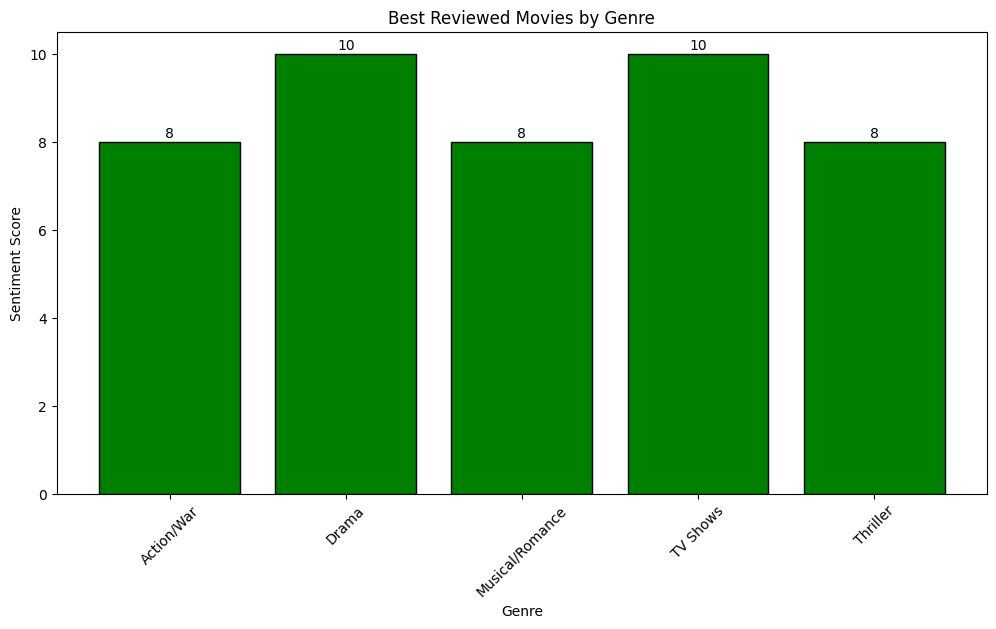

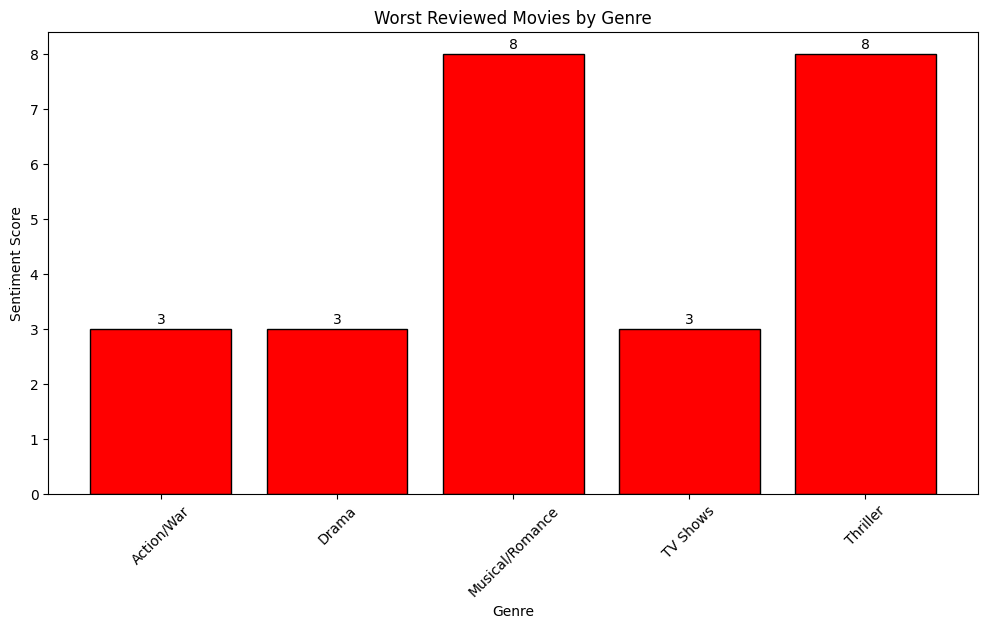

Best Reviewed Movies by Genre:
     Title            Genre  Sentiment_Score
2  Movie C       Action/War                8
0  Movie A            Drama               10
6  Movie G  Musical/Romance                8
4  Movie E         TV Shows               10
7  Movie H         Thriller                8

Worst Reviewed Movies by Genre:
     Title            Genre  Sentiment_Score
3  Movie D       Action/War                3
1  Movie B            Drama                3
6  Movie G  Musical/Romance                8
5  Movie F         TV Shows                3
7  Movie H         Thriller                8


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrame (Replace with your dataset)
# Replace this with your actual data loading code
data = {
    'Title': ['Movie A', 'Movie B', 'Movie C', 'Movie D', 'Movie E', 'Movie F', 'Movie G', 'Movie H'],
    'Genre': ['Drama', 'Drama', 'Action/War', 'Action/War', 'TV Shows', 'TV Shows', 'Musical/Romance', 'Thriller'],
    'Review_Text': [
        'Amazing movie with great acting!',
        'Boring and slow-paced.',
        'Epic battle scenes and action-packed!',
        'Poor storyline and bad acting.',
        'A must-watch for TV series fans!',
        'Terrible pacing, felt incomplete.',
        'Beautiful songs and romantic story.',
        'Kept me on the edge of my seat!'
    ]
}
df = pd.DataFrame(data)

# Step 1: Assign Sentiment Scores as Proxy for Ratings
# Here, we use a simple scoring logic: positive = high score, negative = low score
# Replace with an actual sentiment analysis tool (e.g., TextBlob, VADER, etc.)
def assign_sentiment_score(review):
    if 'amazing' in review.lower() or 'great' in review.lower() or 'must-watch' in review.lower():
        return 10
    elif 'epic' in review.lower() or 'beautiful' in review.lower() or 'edge' in review.lower():
        return 8
    elif 'boring' in review.lower() or 'terrible' in review.lower() or 'poor' in review.lower():
        return 3
    else:
        return 5  # Neutral score

df['Sentiment_Score'] = df['Review_Text'].apply(assign_sentiment_score)

# Step 2: Find Best and Worst Movies by Genre
best_movies = df.loc[df.groupby("Genre")["Sentiment_Score"].idxmax()]
worst_movies = df.loc[df.groupby("Genre")["Sentiment_Score"].idxmin()]

# Step 3: Visualize Best Reviewed Movies
plt.figure(figsize=(12, 6))
plt.bar(best_movies["Genre"], best_movies["Sentiment_Score"], color="green", edgecolor="black")
plt.title("Best Reviewed Movies by Genre")
plt.xlabel("Genre")
plt.ylabel("Sentiment Score")
plt.xticks(rotation=45)
for i, (genre, score) in enumerate(zip(best_movies["Genre"], best_movies["Sentiment_Score"])):
    plt.text(i, score + 0.1, f"{score}", ha="center")
plt.show()

# Step 4: Visualize Worst Reviewed Movies
plt.figure(figsize=(12, 6))
plt.bar(worst_movies["Genre"], worst_movies["Sentiment_Score"], color="red", edgecolor="black")
plt.title("Worst Reviewed Movies by Genre")
plt.xlabel("Genre")
plt.ylabel("Sentiment Score")
plt.xticks(rotation=45)
for i, (genre, score) in enumerate(zip(worst_movies["Genre"], worst_movies["Sentiment_Score"])):
    plt.text(i, score + 0.1, f"{score}", ha="center")
plt.show()

# Step 5: Print Best and Worst Movies
print("Best Reviewed Movies by Genre:")
print(best_movies[["Title", "Genre", "Sentiment_Score"]])

print("\nWorst Reviewed Movies by Genre:")
print(worst_movies[["Title", "Genre", "Sentiment_Score"]])
